In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 步长

In [6]:
def f(x):
    return np.exp(x)

def df1(x, h):
    return (f(x+h) - f(x))/(h)

def df2(x, h):
    return (f(x+h) - f(x-h))/(2*h)

In [7]:
x=1
h=0.001
print(df1(x,h))

2.7196414225332255


In [8]:
x=1
h=0.001
print(df2(x,h))

2.718282281505724


In [9]:
import numpy as np
np.exp(1.0)

2.718281828459045

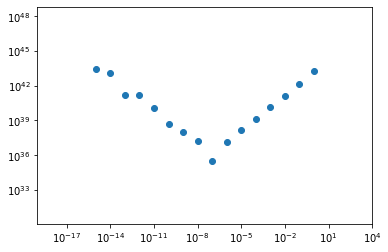

In [10]:
x=100.0
h=1.0
df=np.zeros(16)
dh=np.zeros(16)
err=np.zeros(16)
for i in range(16):
    df[i]=df1(x,h)
    err[i]=np.abs(f(x)-df[i])
    dh[i]=h
    h=h/10.0
plt.xscale("log")
plt.yscale("log")
plt.scatter(dh,err)

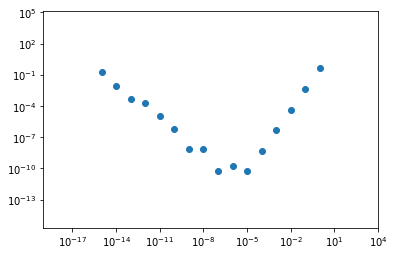

In [14]:
x=1.0
h=1.0
df=np.zeros(16)
dh=np.zeros(16)
err=np.zeros(16)
for i in range(16):
    df[i]=df2(x,h)
    err[i]=np.abs(f(x)-df[i])
    dh[i]=h
    h=h/10.0
plt.xscale("log")
plt.yscale("log")
plt.scatter(dh,err)

In [11]:
def f(x):
    return np.cos(x)

def df1(x, h):
    return (f(x+h) - f(x))/(h)

def df2(x, h):
    return (f(x+h) - f(x-h))/(2*h)

In [12]:
x=1.0
h=0.0001
-np.sin(x)-df1(x,h)

2.7013712616374974e-05

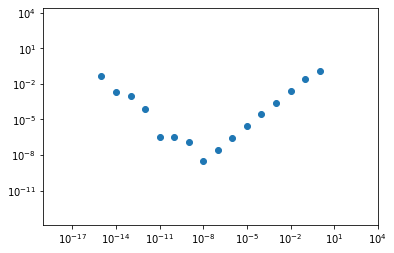

In [13]:
x=1.0
h=1.0
df=np.zeros(16)
dh=np.zeros(16)
err=np.zeros(16)
for i in range(16):
    df[i]=df1(x,h)
    err[i]=np.abs(-np.sin(x)-df[i])
    dh[i]=h
    h=h/10.0
plt.xscale("log")
plt.yscale("log")
plt.scatter(dh,err)

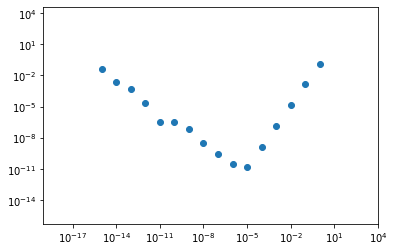

In [14]:
x=1.0
h=1.0
df=np.zeros(16)
dh=np.zeros(16)
err=np.zeros(16)
for i in range(16):
    df[i]=df2(x,h)
    err[i]=np.abs(-np.sin(x)-df[i])
    dh[i]=h
    h=h/10.0
plt.xscale("log")
plt.yscale("log")
plt.scatter(dh,err)

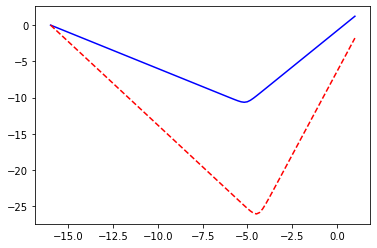

In [18]:
def f(f3,h):
    return 10**(2*h)*f3/6.0+10**(-16)/10**(h)

x_range=np.linspace(-16,1,100)
plt.plot(x_range,np.log10(f(1,x_range)),'b-',x_range,np.log(f(0.01,x_range)),'r--')

# 多项式插值

In [22]:
from scipy.misc import derivative

In [23]:
pi = np.pi
def chebyshev(n):
    return np.array([np.cos((2*i + 1)*pi/(2*n)) for i in range(n)])

In [24]:
def coef(points): #函数嵌套迭代
    if len(points) == 1:
        return points[0, 1]
    return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

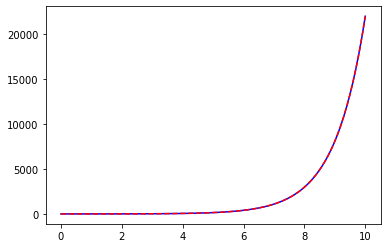

In [25]:
def f(x):
    return np.exp(x)

#x=[0,10]
xi=5.0+5.0*chebyshev(20)
yi=f(xi)
points= np.array([xi, yi]).T
p=Newton(points)
x_range=np.linspace(0,10,100)
plt.plot(x_range,p(x_range),'b-',x_range,f(x_range),'r--')

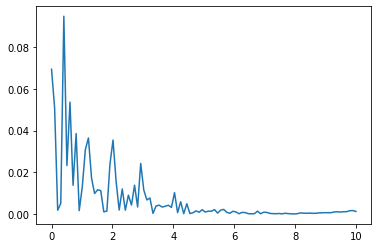

In [26]:
err=np.zeros(100)
for i in range(100):
    err[i]=np.abs(np.exp(x_range[i])-derivative(p, x_range[i], dx=1e-8))
plt.plot(x_range,err)

# 例

In [4]:
def f(x):
    return np.exp(x)

def df1(x, h):
    return (f(x+h) - f(x))/(h)

def df2(x, h):
    return (f(x+h) - f(x-h))/(2*h)

def extdf1(x,h):
    return 2.0*df1(x,h/2)-df1(x,h)

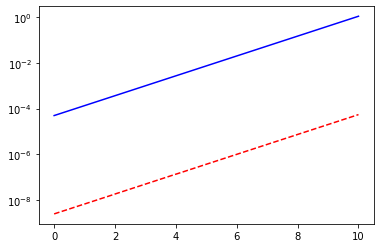

In [28]:
h=10**-4
x_range=np.linspace(0,10,100)
plt.yscale("log")
plt.plot(x_range,np.abs(df1(x_range, h)-df2(x_range, h)),'b-',x_range,np.abs(extdf1(x_range,h)-df2(x_range, h)),'r--')
